# Understanding GAN

<img src="images/boxing.jpg">

 * [Generative Adversarial Nets](https://arxiv.org/pdf/1406.2661.pdf)
 * [NIPS 2016 Tutorial:Generative Adversarial Networks](https://arxiv.org/pdf/1701.00160.pdf)
 * [Understanding Generative Adversarial Networks](https://danieltakeshi.github.io/2017/03/05/understanding-generative-adversarial-networks/)
 * [Adversarially Learned Inference](https://ishmaelbelghazi.github.io/ALI/)
 
해당 문서를 보기전에 공부해야할 문서들
 * [Khan Academy - Game theory and Nash equilibrium](https://www.khanacademy.org/economics-finance-domain/microeconomics/nash-equilibrium-tutorial)

# How do GANs work

GAN의 아이디어는 기본적으로 2개의 모델이 서로 경쟁하듯 학습을 하는 원리입니다. <br>
그중 하나는 **Generator**로서 training data와 동일한 분포형태(distribution)을 갖는 샘플을 생성합니다. <br>
다른 하나는 **Discriminator**로서 샘플 데이터가 real 인지 또는 fake인지 구분합니다. <br>
즉 **2개의 classes** (real or fake)를 갖은 traditional supervised learning을 사용합니다. 

쉽게 이야기하면 Generator는 가짜돈을 찍어내는 도둑놈이고, Discriminator는 가짜돈인지 진짜돈인지 구별해내는 경찰의 역활입니다.<br>
게임에서 이기기 위해서 도둑놈(Generator)은 진짜 돈과 구별할수 없는 가짜 돈을 만들어야 합니다.

도둑놈과 경찰은 2개의 differentiable functions으로 표현이 됩니다. 

| Name | Function | Cost | Input | Parameter |
|:-----|:--------:|:-----:|:---------:|
| Distriminator | $ D $ | $ \theta^{(D)} $ 만 control하면서 minimize $ J^{(D)} \left( \theta^{(D)}, \theta^{(G)} \right) $ | $ x $ | $ \theta^{(D)} $ | 
| Generator     | $ G $ | $ \theta^{(G)} $ 만 control하면서 minimize $ J^{(G)} \left( \theta^{(D)}, \theta^{(G)} \right) $ | $ z $ | $ \theta^{(G)} $ |

위의 표안의 Cost부분에서 나와있듯이, 각각의 player의 cost값은 다른 player의 parameter에 의존하고 있지만, <br>
상대방의 parameters를 건들일수 없기 때문에, 시나리오 자체가 optimization problem보다는 game으로 설명이 더 잘 됩니다.

Optimization문제의 해결책은 cost값의 (local) minimum을 찾는 것입니다.<br>
Game에서의 해결책은 Nash equilibrium입니다. (Local diffenrential Nash equilibria)

<img src="images/gan.png">

* $ D(x) $ 의 목표는 input으로 받은 데이터가 real인지에 대한 (fake가 아니라) 확률값을 output으로 내놓으며 1값으로 만드는게 목표
* $ x $의 절반은 data samples(real)이고, 절반은 generator가 생성산 samples(fake)입니다.
* $ D(G(z)) $ -> latent variable $ z $로부서 generator 가 x sample과 유사한 distribution을 output으로 내놓고, 해당 output은 discriminator가 input $ G(z) $로 받습니다.
* Discriminator는 $ D(G(z)) $를 0으로 만들려고 하며, Generator는 1로 만들려고 합니다.

# Training Process

Simultaneous SGD를 사용하며, 각각의 step마다 2개의 minibatches가 sampled 됩니다. <br>
minibatch of $ x $는 dataset으로 부터 sampled되며, minibatch of $ z $는 latent variables로부터 만들어지게 됩니다. 

이후 2개의 gradient steps이 동시에 일어나게 됩니다.<br>
하나는 $ \theta^{(D)} $를 업데이트하면서 $ J^{(D)} $를 줄입니다.<br>
다른 하나는 $ \theta^{(G)} $를 업데이트하면서 $ J^{(G)} $의 loss를 줄입니다. 

# Cost Function for Discriminator

## Binary Cross Entropy

Discriminator의 loss function은 binary cross entropy loss function을 사용합니다. 

$$ J^{(D)} \left(\theta^{(D)}, \theta^{(G)} \right) = - \frac{1}{N} \sum_{i=1}^N \big[ y_i \log D(\hat{y}_i) + (1-y_i) \log (1-D(\hat{y}_i)) \big] $$ 

GAN에서 $ x_i $는 반은 $ x_i \sim P_{\rm data} $ (즉 true data distribution) 그리고 반은 $ x_i = G(z) $ 이때 $ z \sim p_{\rm generator} $ (generators' distribution)에서 옵니다.<br>
반반이라는 뜻은 $ z \sim {\rm Unif}[0,1] $ 입니다. <br>
dataset으로부터 오는 minibatch의 경우 모두 <span style="color:red">**1**</span>이고, generator로부터 오는 minibatch는 모두 <span style="color:red">**0**</span>입니다.<br>
정확하게 2개의 minibatch를 사용하기 때문에 GAN논문에서는 다음과 같이 cross entropy를 변경하였습니다

$$
\arg \min_{\theta^{(G)}} \max_{\theta^{(D)}} V(\theta^{(D)},\theta^{(G)})
$$

$$ J^{(D)} \left(\theta^{(D)}, \theta^{(G)} \right) = - \frac{1}{2} \mathbb{E}_{x \sim p_{\rm
data}}\Big[ \log D(x)\Big] - \frac{1}{2} \mathbb{E}_{z \sim p_{\rm z}(z)} \Big[\log
(1-D(G(z)))\Big] $$


$ \sum $ 은 expectation으로 변경이 되고, $ y_i $ label 은  $ \frac{1}{2} $으로 변경하였습니다. <br>
또한 $ \log(1-D(x_i)) $ 는 $ \log(1-D(G(z))) $ 으로 변경하였습니다.<br>
모든 GAN버젼의 discriminator는 위의 값을 줄이는데 목표를 갖고 있습니다.

> 즉 expectation은 weight mean인데 여기서 확률은 $ \frac{1}{2} $로 사용하고, <br>
> 값은 $ x_i \sim P_{\rm data} $ (true data distribution) 또는 $ x_i = G(z) $ (generator가 생성한 데이터) 를 사용합니다.

> 실제 구현시에는 그냥 binary crossentropy 사용하면 됩니다.

# Cost Function for Generator

## Minimax 

discriminator에 대한 cost를 함수를 정의했지만, generator에 대한 cost함수는 정의하지 않았습니다. <br>
위에서 언급했듯이 GAN은 optimization 문제라기 보다는 서로 상대방이 싸우면서 성장하는 Game에 더 가깝다고 언급을 했습니다.<br>
단순한 게임의 입장에서 본다면 Zero-Sum Game (모든 플레이어들의 costs의 합은 0이 됨)

$$ J^{(G)} = -J^{(D)} $$

즉 D, G functions은 두명이 참여하는 minimax 게임을 하고 있는 것입니다. 

$$ J^{(G)} = - J^{(D)} =  \theta^{(G)*} = \arg \min_{\theta^{(G)}} \max_{\theta^{(D)}} V(\theta^{(D)},\theta^{(G)}) =   \frac{1}{2} \mathbb{E}_{x \sim P_{data}} \left[ \log D(x) \right] +  \frac{1}{2} \mathbb{E}_{z} \left[ \log( 1 - D(G(z))) \right] $$

## Heuristic, non-saturating game

위의 코드를 실제 적용하면 이론처럼 잘 돌아가지 않습니다. <br>
Discriminator는 cross entropy를 minimize시키고, Generator는 동시에 maximize시키려고 합니다. <br>
처음에는 Discriminator가 실수를 많이 하기 때문에 loss값이 크게 나오며 이는 gradient도 커지게 되며 학습이 빠르게 일어납니다.<br>
문제는 학습하면서 discriminator가 거의 완벽하게 잡아낼때쯤에는 loss값이 0으로 saturate되며, generator의 gradient값은 vanish가 되버립니다.

위의 문제를 해결하기 위해서 crossentropy 를 계속 사용하되, sign 값을 뒤바꿔주는것이 아니라, crossentropy 에서 사용되는 target부분을 뒤바꿔줍니다.

$$ J^{(G)} = -\frac{1}{2}\mathbb{E}_z\Big[\log D(G(z))\Big] $$

### 구현시..

실제로는 그냥 crossentropy 사용하면 됩니다.<br>
예를 들어서 y_true값은 [0, 1] 그리고 y_pred 값은 $ [ \hat{y}_1, \hat{y}_2 ] $ 이렇다면 ..

$$ \begin{align} 
& - [0, 1] \cdot \log([ \hat{y}_1, \hat{y}_2 ]) \\
= & [0, - \log \hat{y}_2]
\end{align} $$

즉 y_true값을 무조건 [0, 1]로 줘버리면 됩니다. ([1, 0] 따위는 그냥 버려버림) 

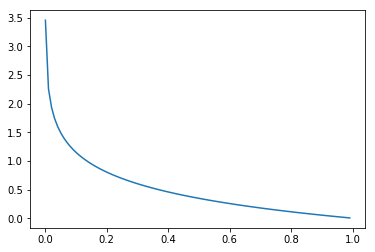

In [27]:

x = np.arange(0.001, 0.999, 0.01)
y = -0.5 *np.log(x)
plot(x, y)

In [53]:
def heuristic_loss(y_true, y_pred):
    return -np.sum(y_true * np.log(y_pred), axis=-1)
    
ys = np.array([[0, 1], [0, 1], [0, 1], [0, 1]])
ps = np.array([[0.001, 0.9], [0.1, 0.9], [0.2, 0.8], [0.01, 0.7]])

print('예측률이 높은 경우 loss 값')
print(heuristic_loss(ys, ps))
print()

ys = np.array([[0, 1], [0, 1], [0, 1], [0, 1]])
ps = np.array([[0.9, 0.01], [0.9, 0.001], [0.8, 0.00005], [0.9, 0.1]])
print('예측률이 낮은 경우 loss 값')
print(heuristic_loss(ys, ps))

예측률이 높은 경우 loss 값
[ 0.10536052  0.10536052  0.22314355  0.35667494]

예측률이 낮은 경우 loss 값
[ 4.60517019  6.90775528  9.90348755  2.30258509]
